In [27]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_circuit_layout
from math import pi, cos, sin , sqrt
from cmath import exp
import matplotlib.ticker as tck
%matplotlib inline


from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

from qiskit.extensions import RXGate, CnotGate, XGate

IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
backend_sim = Aer.get_backend('qasm_simulator')
backend_exp = provider.get_backend('ibmqx2')
sh=1024
y_exp=np.array([])
y_sim=np.array([])
x=np.arange(0,(72.5)*pi/(4*3),pi/(4*3))
x_th=np.arange(0,4*np.pi/3,0.01) 
y_th=((np.cos(x_th*3))+1)/2

ibmqfactory.load_account:WARNING:2020-04-09 19:30:29,792: Credentials are already in use. The existing account in the session will be replaced.


In [2]:
def C_op(ph):
    C = Operator([[(exp(-1j*pi/4)), 0, 0, 0], [0, (1-1j*cos(ph))/(sqrt(2)), 0, (1j*sin(ph))/(sqrt(2))], [0, 0,(exp(1j*pi/4)) , 0], [0, (1j*sin(ph))/(sqrt(2)),0, (1+1j*cos(ph))/(sqrt(2))]])
    C2=C.power(3)
    return C2

In [3]:
C2=C_op(pi/2)
C2

Operator([[-7.07106781e-01-7.07106781e-01j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -7.07106781e-01-4.32978028e-17j
   0.00000000e+00+0.00000000e+00j -4.80500977e-33+7.07106781e-01j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -7.07106781e-01+7.07106781e-01j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -2.55604917e-33+7.07106781e-01j
   0.00000000e+00+0.00000000e+00j -7.07106781e-01+4.32978028e-17j]], input_dims=(2, 2), output_dims=(2, 2))

In [4]:
def BeamS(q,qr,c,cr,f):
    circ=QuantumCircuit(qr,cr)
    for i in range(q-1):
        circ.unitary(C2, [0, i+1], label='C2')
    circ.h(0)
    for i in range(q-1):
        circ.unitary(C2, [0, i+1], label='C2')
    circ=f+circ
    return circ

In [5]:
def measu(qr,cr,f):
    meas=QuantumCircuit(qr,cr)
    meas.barrier(qr[:])
    meas.measure(qr[:],cr[:])
    qc=f+meas
    return qc

In [6]:
def phase(q,qr,c,cr,ph,f):
    circ=QuantumCircuit(qr,cr)
    for i in range(q):
        circ.u1(ph,i)
    return f+circ

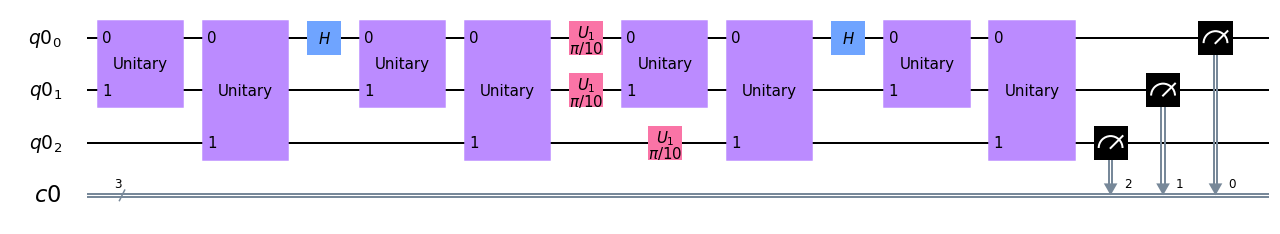

In [7]:
#Create circuit
q=3
c=3
qr=QuantumRegister(q)
cr=ClassicalRegister(c)
MZ=QuantumCircuit(qr,cr)
#initialize state
#vec=np.zeros(2**q)
#vec[(2**q)-1]=1  
#MZ.initialize(vec, [qr[:]])
#BeamSplitter
MZ=BeamS(q,qr,c,cr,MZ)
#phase
MZ=phase(q,qr,c,cr,pi/(2*5),MZ)
#BeamSplitter
MZ=BeamS(q,qr,c,cr,MZ)
#measurements
MZ=measu(qr,cr,MZ)

style={'cregbundle':True,'dpi':300,'fontsize':15,'subfontsize':15,'margin':[1,0.1,0.1,0.1], 'displaytext':{
    'id': 'id',
    'u0': 'U_0',
    'u1': 'U_1',
    'u2': 'U_2',
    'u3': 'U_3',
    'x': 'X',
    'y': 'Y',
    'z': 'Z',
    'h': 'H',
    's': 'S',
    'sdg': 'S^\dagger',
    't': 'T',
    'tdg': 'T^\dagger',
    'rx': 'R_x',
    'ry': 'R_y',
    'rz': 'R_z',
    'reset': '\left|0\right\rangle',
    'unitary': 'C^{2}'
}}
MZ.draw(output='mpl',style=style,plot_barriers=False,justify='right',fold=30,filename='C2_3qubit_MZI.pdf')

In [8]:
def MZI(q,qr,c,cr,ph):
    MZ=QuantumCircuit(qr,cr)
    #initialize state
    #vec=np.zeros(2**q)
    #vec[(2**q)-1]=1  
    #MZ.initialize(vec, [qr[:]])
    #BeamSplitter
    MZ=BeamS(q,qr,c,cr,MZ)
    #phase
    MZ=phase(q,qr,c,cr,ph,MZ)
    #BeamSplitter
    MZ=BeamS(q,qr,c,cr,MZ)
    #measurements
    MZ=measu(qr,cr,MZ)
    return MZ

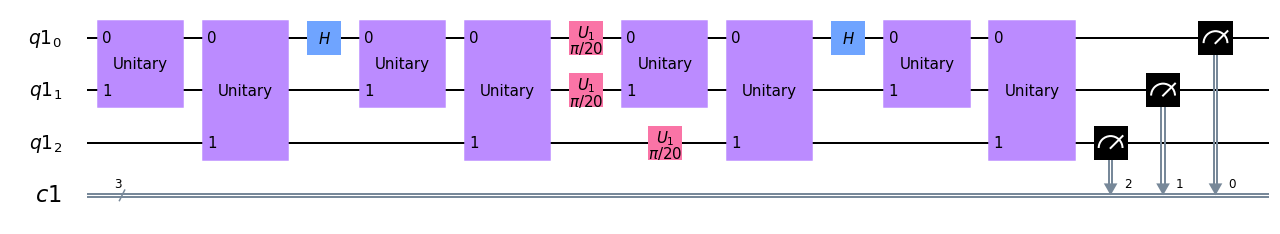

In [9]:
q=3
c=3
qr=QuantumRegister(q)
cr=ClassicalRegister(c)
Mz=MZI(q,qr,c,cr,(pi/(4*5)))
style={'cregbundle':True,'dpi':300,'fontsize':15,'subfontsize':15,'margin':[1,0.1,0.1,0.1], 'displaytext':{
    'id': 'id',
    'u0': 'U_0',
    'u1': 'U_1',
    'u2': 'U_2',
    'u3': 'U_3',
    'x': 'X',
    'y': 'Y',
    'z': 'Z',
    'h': 'H',
    's': 'S',
    'sdg': 'S^\dagger',
    't': 'T',
    'tdg': 'T^\dagger',
    'rx': 'R_x',
    'ry': 'R_y',
    'rz': 'R_z',
    'reset': '\left|0\right\rangle',
    'unitary': 'C^{2}'
}}
Mz.draw(output='mpl',style=style,plot_barriers=False,justify='right',fold=30,filename='C2_3qubit_MZI.pdf')

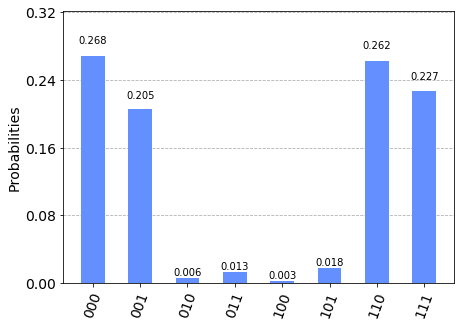

In [10]:
#Sim (Pi/4)
MZ=MZI(q,qr,c,cr,x[1])
job_sim = execute(MZ, backend_sim, shots=sh)
result_sim=job_sim.result()
counts_sim=result_sim.get_counts(MZ)
plot_histogram(counts_sim)

Depth: 16


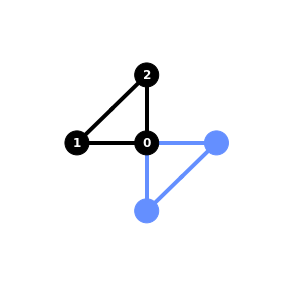

In [11]:
#exp (Pi/4)
MZ_tp = transpile(MZ, backend=backend_exp, optimization_level=3, initial_layout=[2,0,1,3,4])
print('Depth:', MZ_tp.depth())
plot_circuit_layout(MZ_tp, backend_exp)

In [12]:
#exp (Pi/4)
#job_exp= execute(MZ_tp, backend=backend_exp)
#job_exp.job_id()

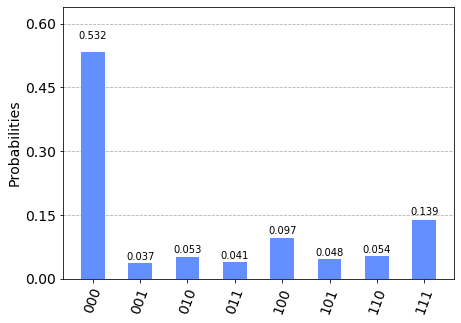

In [13]:
#exp (Pi/4)
job_exp = backend_exp.retrieve_job('5e8502ffa2cbba0012b1d834')
result_exp=job_exp.result()
counts=result_exp.get_counts()
plot_histogram(counts)

In [14]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [15]:
cal_circuits,state_labels=complete_meas_cal(qr=qr, circlabel='measurement_calibration')
cal_circuits[7].draw()

┌───┐ ░ ┌─┐      
q1_0: |0>┤ X ├─░─┤M├──────
         ├───┤ ░ └╥┘┌─┐   
q1_1: |0>┤ X ├─░──╫─┤M├───
         ├───┤ ░  ║ └╥┘┌─┐
q1_2: |0>┤ X ├─░──╫──╫─┤M├
         └───┘ ░  ║  ║ └╥┘
 c2_0: 0 ═════════╩══╬══╬═
                     ║  ║ 
 c2_1: 0 ════════════╩══╬═
                        ║ 
 c2_2: 0 ═══════════════╩═

In [16]:
#cal_job=execute(cal_circuits, backend=backend_exp, shots=8192,optimization_level=0)
#cal_job.job_id()

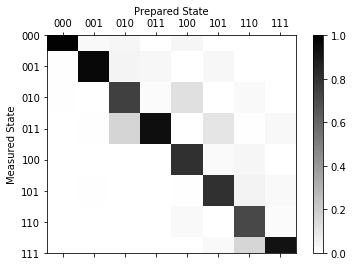

In [17]:
cal_job = backend_exp.retrieve_job('5e85032ca76e42001232093d')
cal_results=cal_job.result()
meas_fitter=CompleteMeasFitter(cal_results,state_labels)
meas_fitter.plot_calibration()

In [18]:
meas_filter=meas_fitter.filter

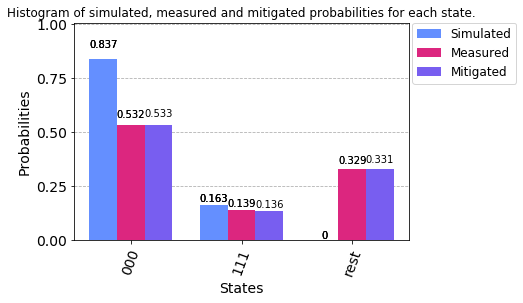

In [19]:
#mitigated exp Pi/4
job_exp = backend_exp.retrieve_job('5e8502ffa2cbba0012b1d834')
result_exp=job_exp.result()
mitigated_result=meas_filter.apply(result_exp)
counts=result_exp.get_counts()
mitigated_counts=mitigated_result.get_counts()

fig, ax=plt.subplots()
ax.set_xlabel('States', fontsize=14)
fig=plot_histogram([counts_sim,counts,mitigated_counts],legend=['Simulated','Measured','Mitigated'], number_to_keep=2, title='Histogram of simulated, measured and mitigated probabilities for each state.', ax=ax)
#fig_hist=plot_histogram([counts_sim,counts,mitigated_counts],legend=['Simulated','Real','Mitigated'])
fig

In [28]:
#simulating every circuit
circuits=[]
for i in range(len(x)):
    q=3
    c=3
    qr=QuantumRegister(q)
    cr=ClassicalRegister(c)
    MZ=MZI(q,qr,c,cr,x[i])
    circuits.append(MZ)
    
job_sim=execute(circuits,backend=backend_sim, shots=sh)
result_sim=job_sim.result()
y_sim=np.array([])
    
for i in range(len(x)):
    counts_sim=result_sim.get_counts(circuits[i])
    try:
        counts_sim['000']
    except KeyError:
         y_sim=np.append(y_sim,[0])
    else:
        y_sim=np.append(y_sim,[counts_sim['000']/sh])
        
y_sim



array([0.21875   , 0.26269531, 0.25585938, 0.25292969, 0.1796875 ,
       0.09667969, 0.05957031, 0.08886719, 0.17285156, 0.3984375 ,
       0.69433594, 0.91894531, 1.        , 0.91601562, 0.72070312,
       0.43359375, 0.20117188, 0.07324219, 0.06933594, 0.11914062,
       0.203125  , 0.26757812, 0.28710938, 0.23632812, 0.24511719,
       0.24023438, 0.28027344, 0.2578125 , 0.20605469, 0.1171875 ,
       0.05664062, 0.06347656, 0.21386719, 0.43457031, 0.69042969,
       0.91699219, 1.        , 0.91601562, 0.71484375, 0.45703125,
       0.21679688, 0.08203125, 0.06445312, 0.10449219, 0.19921875,
       0.27050781, 0.24902344, 0.25      , 0.26464844, 0.27246094,
       0.25683594, 0.25390625, 0.19238281, 0.13085938, 0.05957031,
       0.07714844, 0.21191406, 0.42578125, 0.71972656, 0.93066406,
       1.        , 0.93066406, 0.71484375, 0.43066406, 0.18359375,
       0.06835938, 0.05566406, 0.10546875, 0.21777344, 0.24121094,
       0.27929688, 0.25097656, 0.24902344])

In [29]:
#EXP every circuit
circuits_tp=[]
for i in range(len(x)):
    circuits_tp.append( transpile(circuits[i], backend=backend_exp, optimization_level=3, initial_layout=[2,0,1,3,4]))

job_exp= execute(circuits_tp, backend=backend_exp)
job_exp.job_id()

'5e8fa24a3ce9e800130a9709'

In [31]:
#job_exp = backend_exp.retrieve_job('5e8fa063cc4c5d0011f03b29') #32.5
#job_exp = backend_exp.retrieve_job('5e8fa13f3ce9e800130a96fd') #64.5
job_exp = backend_exp.retrieve_job('5e8fa24a3ce9e800130a9709') #72.5
result_exp=job_exp.result()
y_exp=np.array([])

for i in range(len(x)):
    counts_exp=result_exp.get_counts(i)
    try:
        counts_exp['000']
    except KeyError:
         y_exp=np.append(y_exp,[0])
    else:
        y_exp=np.append(y_exp,[counts_exp['000']/sh])
        
y_exp

array([0.18554688, 0.22851562, 0.3125    , 0.35351562, 0.30859375,
       0.23046875, 0.12207031, 0.0859375 , 0.14648438, 0.25      ,
       0.36230469, 0.43457031, 0.47558594, 0.39746094, 0.27929688,
       0.14941406, 0.09570312, 0.15429688, 0.22363281, 0.30078125,
       0.32226562, 0.31542969, 0.23535156, 0.18554688, 0.21289062,
       0.25      , 0.30957031, 0.32910156, 0.30371094, 0.24414062,
       0.11132812, 0.08007812, 0.12695312, 0.23632812, 0.37109375,
       0.43847656, 0.52539062, 0.39355469, 0.26171875, 0.15820312,
       0.10253906, 0.14550781, 0.24316406, 0.28027344, 0.32421875,
       0.3203125 , 0.25878906, 0.18359375, 0.17382812, 0.23144531,
       0.30371094, 0.35351562, 0.29589844, 0.22070312, 0.11132812,
       0.0703125 , 0.11621094, 0.22753906, 0.37597656, 0.45019531,
       0.50195312, 0.41503906, 0.26171875, 0.14550781, 0.11132812,
       0.12109375, 0.23144531, 0.29101562, 0.33886719, 0.31152344,
       0.24023438, 0.2109375 , 0.1953125 ])

In [15]:
y_sim

array([0.24121094, 0.27246094, 0.25097656, 0.24316406, 0.22070312,
       0.12792969, 0.06542969, 0.07324219, 0.18652344, 0.43945312,
       0.69335938, 0.90039062, 1.        , 0.91992188, 0.6953125 ,
       0.44042969, 0.21875   , 0.06542969, 0.07226562, 0.11914062,
       0.19433594, 0.27148438, 0.29101562, 0.26171875, 0.27539062,
       0.25488281, 0.25976562, 0.26757812, 0.1953125 , 0.12207031,
       0.0546875 , 0.07910156, 0.19726562])

In [30]:
x

array([ 0.        ,  0.26179939,  0.52359878,  0.78539816,  1.04719755,
        1.30899694,  1.57079633,  1.83259571,  2.0943951 ,  2.35619449,
        2.61799388,  2.87979327,  3.14159265,  3.40339204,  3.66519143,
        3.92699082,  4.1887902 ,  4.45058959,  4.71238898,  4.97418837,
        5.23598776,  5.49778714,  5.75958653,  6.02138592,  6.28318531,
        6.54498469,  6.80678408,  7.06858347,  7.33038286,  7.59218225,
        7.85398163,  8.11578102,  8.37758041,  8.6393798 ,  8.90117919,
        9.16297857,  9.42477796,  9.68657735,  9.94837674, 10.21017612,
       10.47197551, 10.7337749 , 10.99557429, 11.25737368, 11.51917306,
       11.78097245, 12.04277184, 12.30457123, 12.56637061, 12.82817   ,
       13.08996939, 13.35176878, 13.61356817, 13.87536755, 14.13716694,
       14.39896633, 14.66076572, 14.9225651 , 15.18436449, 15.44616388,
       15.70796327, 15.96976266, 16.23156204, 16.49336143, 16.75516082,
       17.01696021, 17.27875959, 17.54055898, 17.80235837, 18.06

In [89]:
y_exp

array([1.        , 0.53222656, 0.45507812, 0.15722656, 0.0625    ,
       0.13085938, 0.30273438, 0.61132812, 0.6171875 ])

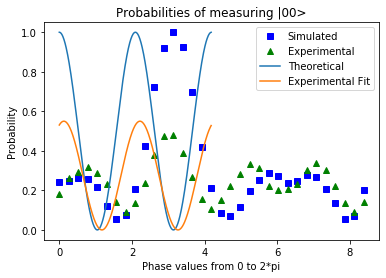

In [25]:
y_fit = 0.55*(np.cos(3*((x_th)-(4*pi/100)))+1)/2
plt.plot(x,y_sim,'bs',x,y_exp,'g^',x_th,y_th,x_th,y_fit)
plt.xlabel('Phase values from 0 to 2*pi') 
plt.ylabel('Probability')
plt.title('Probabilities of measuring |00>')
plt.legend(['Simulated', 'Experimental','Theoretical','Experimental Fit'],loc=1)     
plt.show()

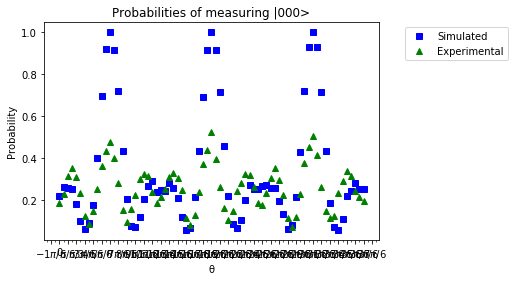

In [32]:
fig, ax = plt.subplots()
x_fit=np.arange(0,4*np.pi/6,0.01)
ax.plot(x,y_sim,'bs',x,y_exp,'g^')
plt.xlabel('θ') 
plt.ylabel('Probability')
plt.title('Probabilities of measuring |000>')
lg=plt.legend(['Simulated', 'Experimental'],loc=1,bbox_to_anchor=(1.4,1))
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 6))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))

def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(6 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/6$"
    elif N == 2:
        return r"$\pi/3$"
    elif N == 4:
        return r"$4\pi/6$"
    elif N== 6:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/6$".format(N)
    else:
        return r"${0}\pi/6$".format(N // 1)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

plt.show()
fig.savefig('MZ_3Qubit_C2_graph.pdf',bbox_extra_artists=(lg,), bbox_inches='tight')

In [92]:
MZ_tp.draw()

AttributeError: 'NoneType' object has no attribute 'register'